# Bài tập tuần 5

## Thông tin học viên

| Họ và tên |MSHV |
|-----------|----------------|
|Trần Hoàng Quân|19120338|

## Import các thư viện cần thiết

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from patsy import dmatrices

# Đề bài
Có số liệu thống kê về *lãi suất ngân hàng* ($X$, *% năm*) và *tổng vốn đầu tư* ($Y$, *tỉ đồng*) trên địa bàn tỉnh A qua 10 năm liên tiếp như sau:

|Năm|1|2|3|4|5|6|7|8|9|10|
|---|-|-|-|-|-|-|-|-|-|--|
|$X$|7.0|6.5|6.5|6.0|6.0|6.0|5.5|5.5|5.0|4.5|
|$Y$|29|32|31|34|32|35|40|43|48|50|

1. Hãy lập mô hình hồi quy tuyến tính mô tả quan hệ giữa tổng vốn đầu tư và lãi suất ngân hàng (mô hình hồi quy đơn)? Nêu ý nghĩa của các hệ số hồi quy ước lượng được? Đánh giá mức độ phù hợp của mô hình?
2. Kiểm định giả thuyết "Hệ số hồi quy của $X$ trong hàm hồi quy tổng thể bằng $0$ với mức ý nghĩa $2\%$" và nêu ý nghĩa của kết quả?
3. Dự báo tổng vốn đầu tư trung bình khi lãi suất là $4.8\%$/năm với độ tin cậy $98\%$?

# Câu 1

## Lập mô hình hồi quy tuyến tính mô tả quan hệ giữa tổng vốn đầu tư và lãi suất ngân hàng (mô hình hồi quy đơn)? 

In [2]:
df = pd.DataFrame({
    "X": [7.0, 6.5, 6.5, 6.0, 6.0, 6.0, 5.5, 5.5, 5.0, 4.5],
    "Y": [29, 32, 31, 34, 32, 35, 40, 43, 48, 50]
})

Phương trình hồi quy tuyến tính đơn có dạng

$$
y = \beta_0 + \beta_1x
$$

Theo công thức, ta có

$$
\beta_1 = \frac{\bar{xy} - \bar{x}\bar{y}}{\bar{x^2} - \bar{x}^2} 
$$
$$
\beta_0 = \bar{y} - \beta_1\bar{x}
$$

In [3]:
mean_xy = np.mean(df["X"] * df["Y"])
mean_x = np.mean(df["X"])
mean_y = np.mean(df["Y"])
mean_x_squared = np.mean(df["X"] ** 2)

In [4]:
beta_1 = (mean_xy - mean_x * mean_y) / (mean_x_squared - mean_x ** 2)
beta_0 = mean_y - beta_1 * mean_x

In [5]:
print(f"beta_0 = {beta_0:.4f}, beta_1 = {beta_1:.4f}")

beta_0 = 93.1642, beta_1 = -9.5323


Phương trình hồi quy có dạng
$$
y = 93.1642 - 9.5323x
$$


với 

- $x$ là lãi suất *(%/năm)*;
- $y$ là tổng vốn đầu tư của tỉnh A trong năm đó *(tỉ đồng)*;
- các hệ số hồi quy $\beta_0 = 93.1642, \beta_1 = -9.5323$. 

Phương trình hồi quy có thể được trực quan hóa bằng đồ thị như sau:

In [6]:
predictions = [(beta_0 + beta_1 * x) for x in df["X"]]

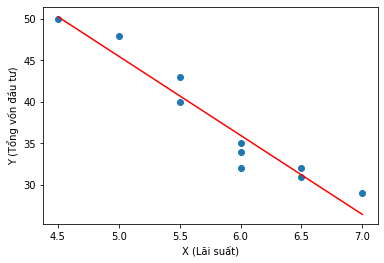

In [7]:
plt.scatter(x = df["X"], y = df["Y"])
plt.plot(df["X"], predictions, color = "r")
plt.xlabel("X (Lãi suất)")
plt.ylabel("Y (Tổng vốn đầu tư)")
plt.show()

Kiểm tra bằng thư viện `statsmodels`:

In [8]:
result = smf.ols("Y ~ X", data = df).fit()

In [9]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     91.78
Date:                Sun, 21 May 2023   Prob (F-statistic):           1.17e-05
Time:                        20:08:07   Log-Likelihood:                -21.096
No. Observations:                  10   AIC:                             46.19
Df Residuals:                       8   BIC:                             46.80
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     93.1642      5.863     15.889      0.0

/home/tlxuong/.local/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## Ý nghĩa của các hệ số hồi quy ước lượng được?

Xét hàm hồi quy
$$
y = 93.1642 - 9.5323x
$$

với $\beta_0 = 93.1642, \beta_1 = -9.5323$. Ý nghĩa của các hệ số hồi quy lần lượt như sau:

- $\beta_1 = -9.5323$: trong điều kiện các yếu tố khác không đổi, khi tăng (giảm) lãi suất 1%/năm thì tổng vốn đầu tư trung bình sẽ giảm (tăng) 9.5323 tỉ đồng.
- $\beta_0 = 93.1642$: trong điều kiện các yếu tố khác không đổi, khi lãi suất là 0%/năm thì tổng vốn đầu tư trung bình của tỉnh A là 93.1642 tỉ đồng.

## Đánh giá mức độ phù hợp của mô hình?

Để đánh giá mức độ phù hợp của mô hình, ta cần phải tính các đại lượng $TSS, ESS$ và $R^2$ của mô hình đó. 

Ta có:

$$
\displaystyle
TSS = \sum_{i = 1}^{n} (y_i - \bar{y})^2
$$
$$
\displaystyle
ESS = \sum_{i = 1}^{n} (\hat{y}_i - \bar{y})^2
$$
$$
\displaystyle
R^2 = \frac{ESS}{TSS}
$$

In [10]:
tss = np.sum((df["Y"] - mean_y)**2)
ess = np.sum(((beta_0 + beta_1 * df["X"]) - mean_y)**2)
r_squared = ess / tss

In [11]:
print(f"Giá trị R^2: {r_squared:.4f}")

Giá trị R^2: 0.9198


Chỉ số $R^2 = 91,98\%$ thể hiện mô hình hồi quy có thể đưa ra giải thích cho $91,98\%$ tống vốn đầu tư $Y$ của tỉnh A dựa trên lãi suất hàng năm $X$. Chỉ số này khá cao, nên ta có thể nhận định mô hình hồi quy đưa ra là tương đối phù hợp cho tập dữ liệu này.

# Câu 2

## Kiểm định giả thuyết "Hệ số hồi quy của $X$ trong hàm hồi quy tổng thể bằng $0$ với mức ý nghĩa $2\%$"

Khi đó:

- $H_0: \beta_1 = \beta$
- $H_a: \beta_1 \neq \beta$

Với $\beta$ trong trường hợp này bằng $0$; mức ý nghĩa $2\%\ (\alpha = 0.02)$. Giả thuyết $H_0$ bị bác bỏ khi $p$-value của $\beta_1$ < $\alpha$

Ta cần tính giá trị $p$-value của $\beta_1$, trong đó $p$-value dựa vào giá trị $t$ của $\beta_1$ có công thức như sau:

$$
t=\frac{\beta_1 - \beta}{se(\beta_1)}
$$
$$
se(\beta_1)=\sqrt{\frac{1}{n - 2}\frac{\sum_{i = 1}^n(y_i - \hat{y}_i)^2}{\sum_{i = 1}^n (x_i - \bar{x}_i) ^ 2}}
$$

In [12]:
s_2 = np.sum((df["Y"] - (beta_1 * df["X"] + beta_0))**2) / (df.shape[0] - 2)
se_beta_1 = np.sqrt(s_2 / np.sum((df["X"] - mean_x) ** 2))

In [13]:
t = beta_1 / se_beta_1

In [14]:
print(f"se_beta_1: {se_beta_1:.4f}")

se_beta_1: 0.9950


In [15]:
# Dùng stats.t.cdf để tính p-value của t_statistic với hệ số tự do df = 10 (sample) - 2 (biến) = 8.
p_value = stats.t.cdf(t, df = df.shape[0] - 2)

In [16]:
print(f"Giá trị t-value: {t:.4f}, giá trị p-value của beta_1 = {p_value:.9f}")

Giá trị t-value: -9.5800, giá trị p-value của beta_1 = 0.000005841


In [17]:
alpha = .02
print(f"p_value < alpha? {p_value < alpha}")

p_value < alpha? True


Giá trị $p$-value < $\alpha$, khi đó ta có thể bác bỏ giả thuyết $H_0$.

## Nêu ý nghĩa của kết quả?

Đối với mô hình hồi quy được đề xuất, với mức ý nghĩa $2\%$:

- Giữa biến ngẫu nhiên $X$ và biến phụ thuộc $Y$ có mối quan hệ có ý nghĩa về thống kê.
- Trong ngữ cảnh bài toán, giữa yếu tố lãi suất trong năm $X$ và tổng vốn đầu tư $Y$ của tỉnh A có sự phụ thuộc với nhau.

# Câu 3

## Dự báo tổng vốn đầu tư trung bình khi lãi suất là $4.8\%$/năm với độ tin cậy $98\%$

Khoảng tin cậy $98\%$ cho giá trị trung bình dự báo tổng vốn đầu tư với lãi suất là $4.8\%$/năm và độ tin cậy $98\%$ (mức ý nghĩa $\alpha = 0.02$) có công thức như sau:

$$
\left[\hat{y}-se(\hat{y})\times t\left(1-\frac{\alpha}{2}, n-2\right), \hat{y}+se(\hat{y})\times t\left(1-\frac{\alpha}{2}, n-2\right) \right]
$$

Với $\hat{y}$ là giá trị dự báo tổng vốn đầu tư trung bình khi lãi suất là $4.8\%$/năm. $se(\hat{y})$ được tính như sau:

$$
se(\hat{y})=\sqrt{\hat{\sigma}^2\left[\frac{1}{n} + \frac{(x - \bar{x})^2}{\sum_{i = 1}^n (x_i - \bar{x})^2}\right]}
$$
$$
\hat{\sigma}^2 = \frac{1}{n - 2}\sum_{i = 1}^{n}(y_i - \hat{y}_i)^2
$$

Giá trị dự báo tổng vốn đầu tư trung bình $\hat{y}$ khi lãi suất $x = 4.8$ *(%/năm)*:

In [18]:
y_hat = beta_0 + beta_1 * 4.8

In [19]:
print(f"Tổng vốn đầu tư trung bình: {y_hat:.4f} (tỉ đồng)")

Tổng vốn đầu tư trung bình: 47.4090 (tỉ đồng)


In [20]:
alpha = .02

Giá trị $t\left(1-\frac{\alpha}{2}, n - 2\right)$:

In [21]:
t_value_alpha = stats.t.cdf(1 - alpha / 2, df.shape[0] - 2) 

In [22]:
t_value_alpha

0.8244157820270234

Giá trị $\hat{\sigma}^2$:

In [23]:
sigma_hat_square = np.sum((df["Y"] - (beta_0 + beta_1 * df["X"])) ** 2) / (df.shape[0] - 2)

In [24]:
sigma_hat_square

4.975124378109447

Giá trị $se(\hat{y})$:

In [25]:
se_y_hat = np.sqrt(sigma_hat_square * ((1/df.shape[0]) + (((4.8 - mean_x)**2) / np.sum((df["X"] - mean_x) ** 2))))

In [26]:
se_y_hat

1.2605830307781014

In [27]:
print(f"Khoảng tin cậy 98% cho dự báo tổng vốn đầu tư trung bình: [{(y_hat - se_y_hat * t_value_alpha):.4f}, {(y_hat + se_y_hat * t_value_alpha):.4f}]")

Khoảng tin cậy 98% cho dự báo tổng vốn đầu tư trung bình: [46.3697, 48.4482]


Vậy, khoảng tin cậy $98\%$ cho dự báo tổng vốn đầu tư trung bình với lãi suất $4.8\%$/năm là $[46.1484, 48.6695]$ *(đơn vị: tỉ đồng)*